### Random Forest 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data=pd.read_excel("glass.xlsx",sheet_name="glass")

In [2]:
data.shape

(214, 10)

In [3]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [5]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [6]:
data.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

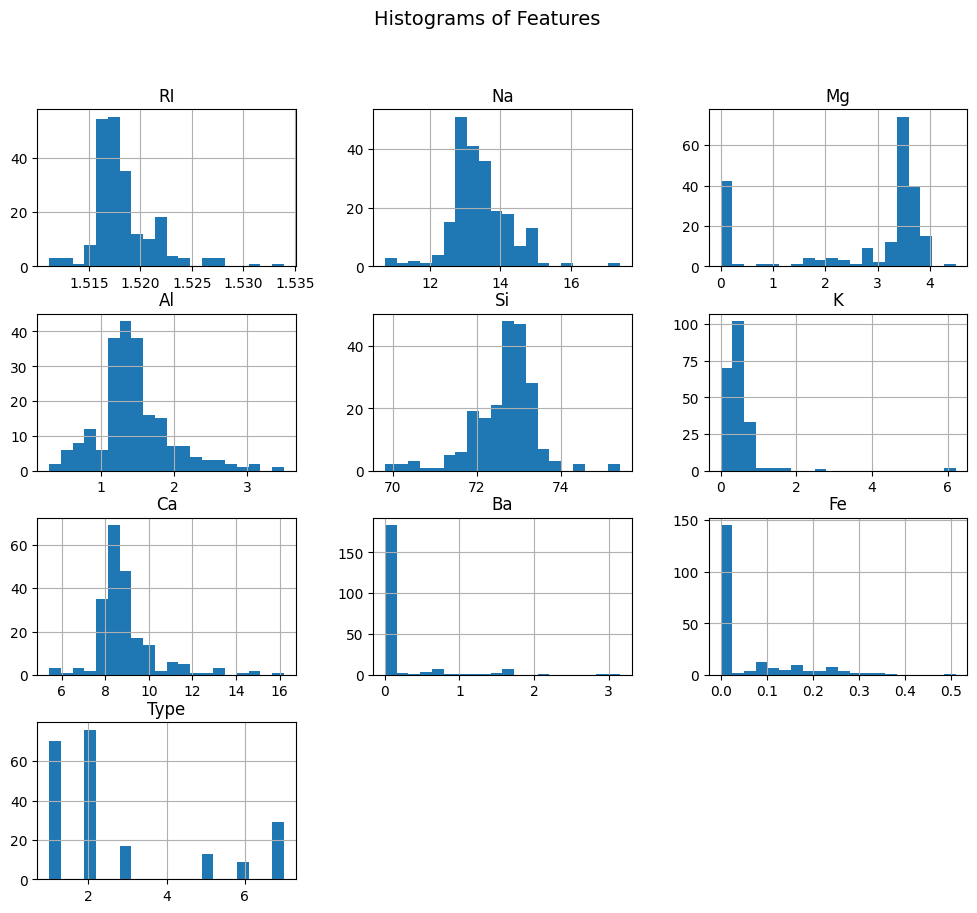

In [7]:
#Data Visualization
#Histograms
data.hist(figsize=(12,10), bins=20)
plt.suptitle("Histograms of Features",fontsize=14)
plt.show()

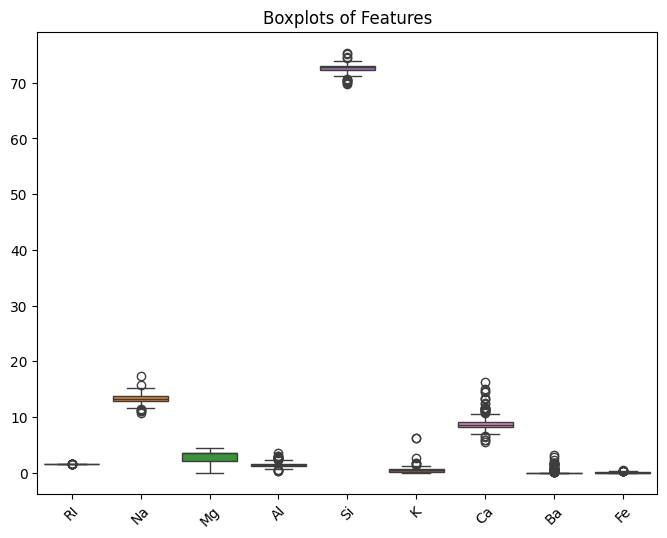

In [8]:
#Boxplots
plt.figure(figsize=(8,6))
sns.boxplot(data=data.drop(columns="Type"))
plt.xticks(rotation=45)
plt.title("Boxplots of Features")
plt.show()

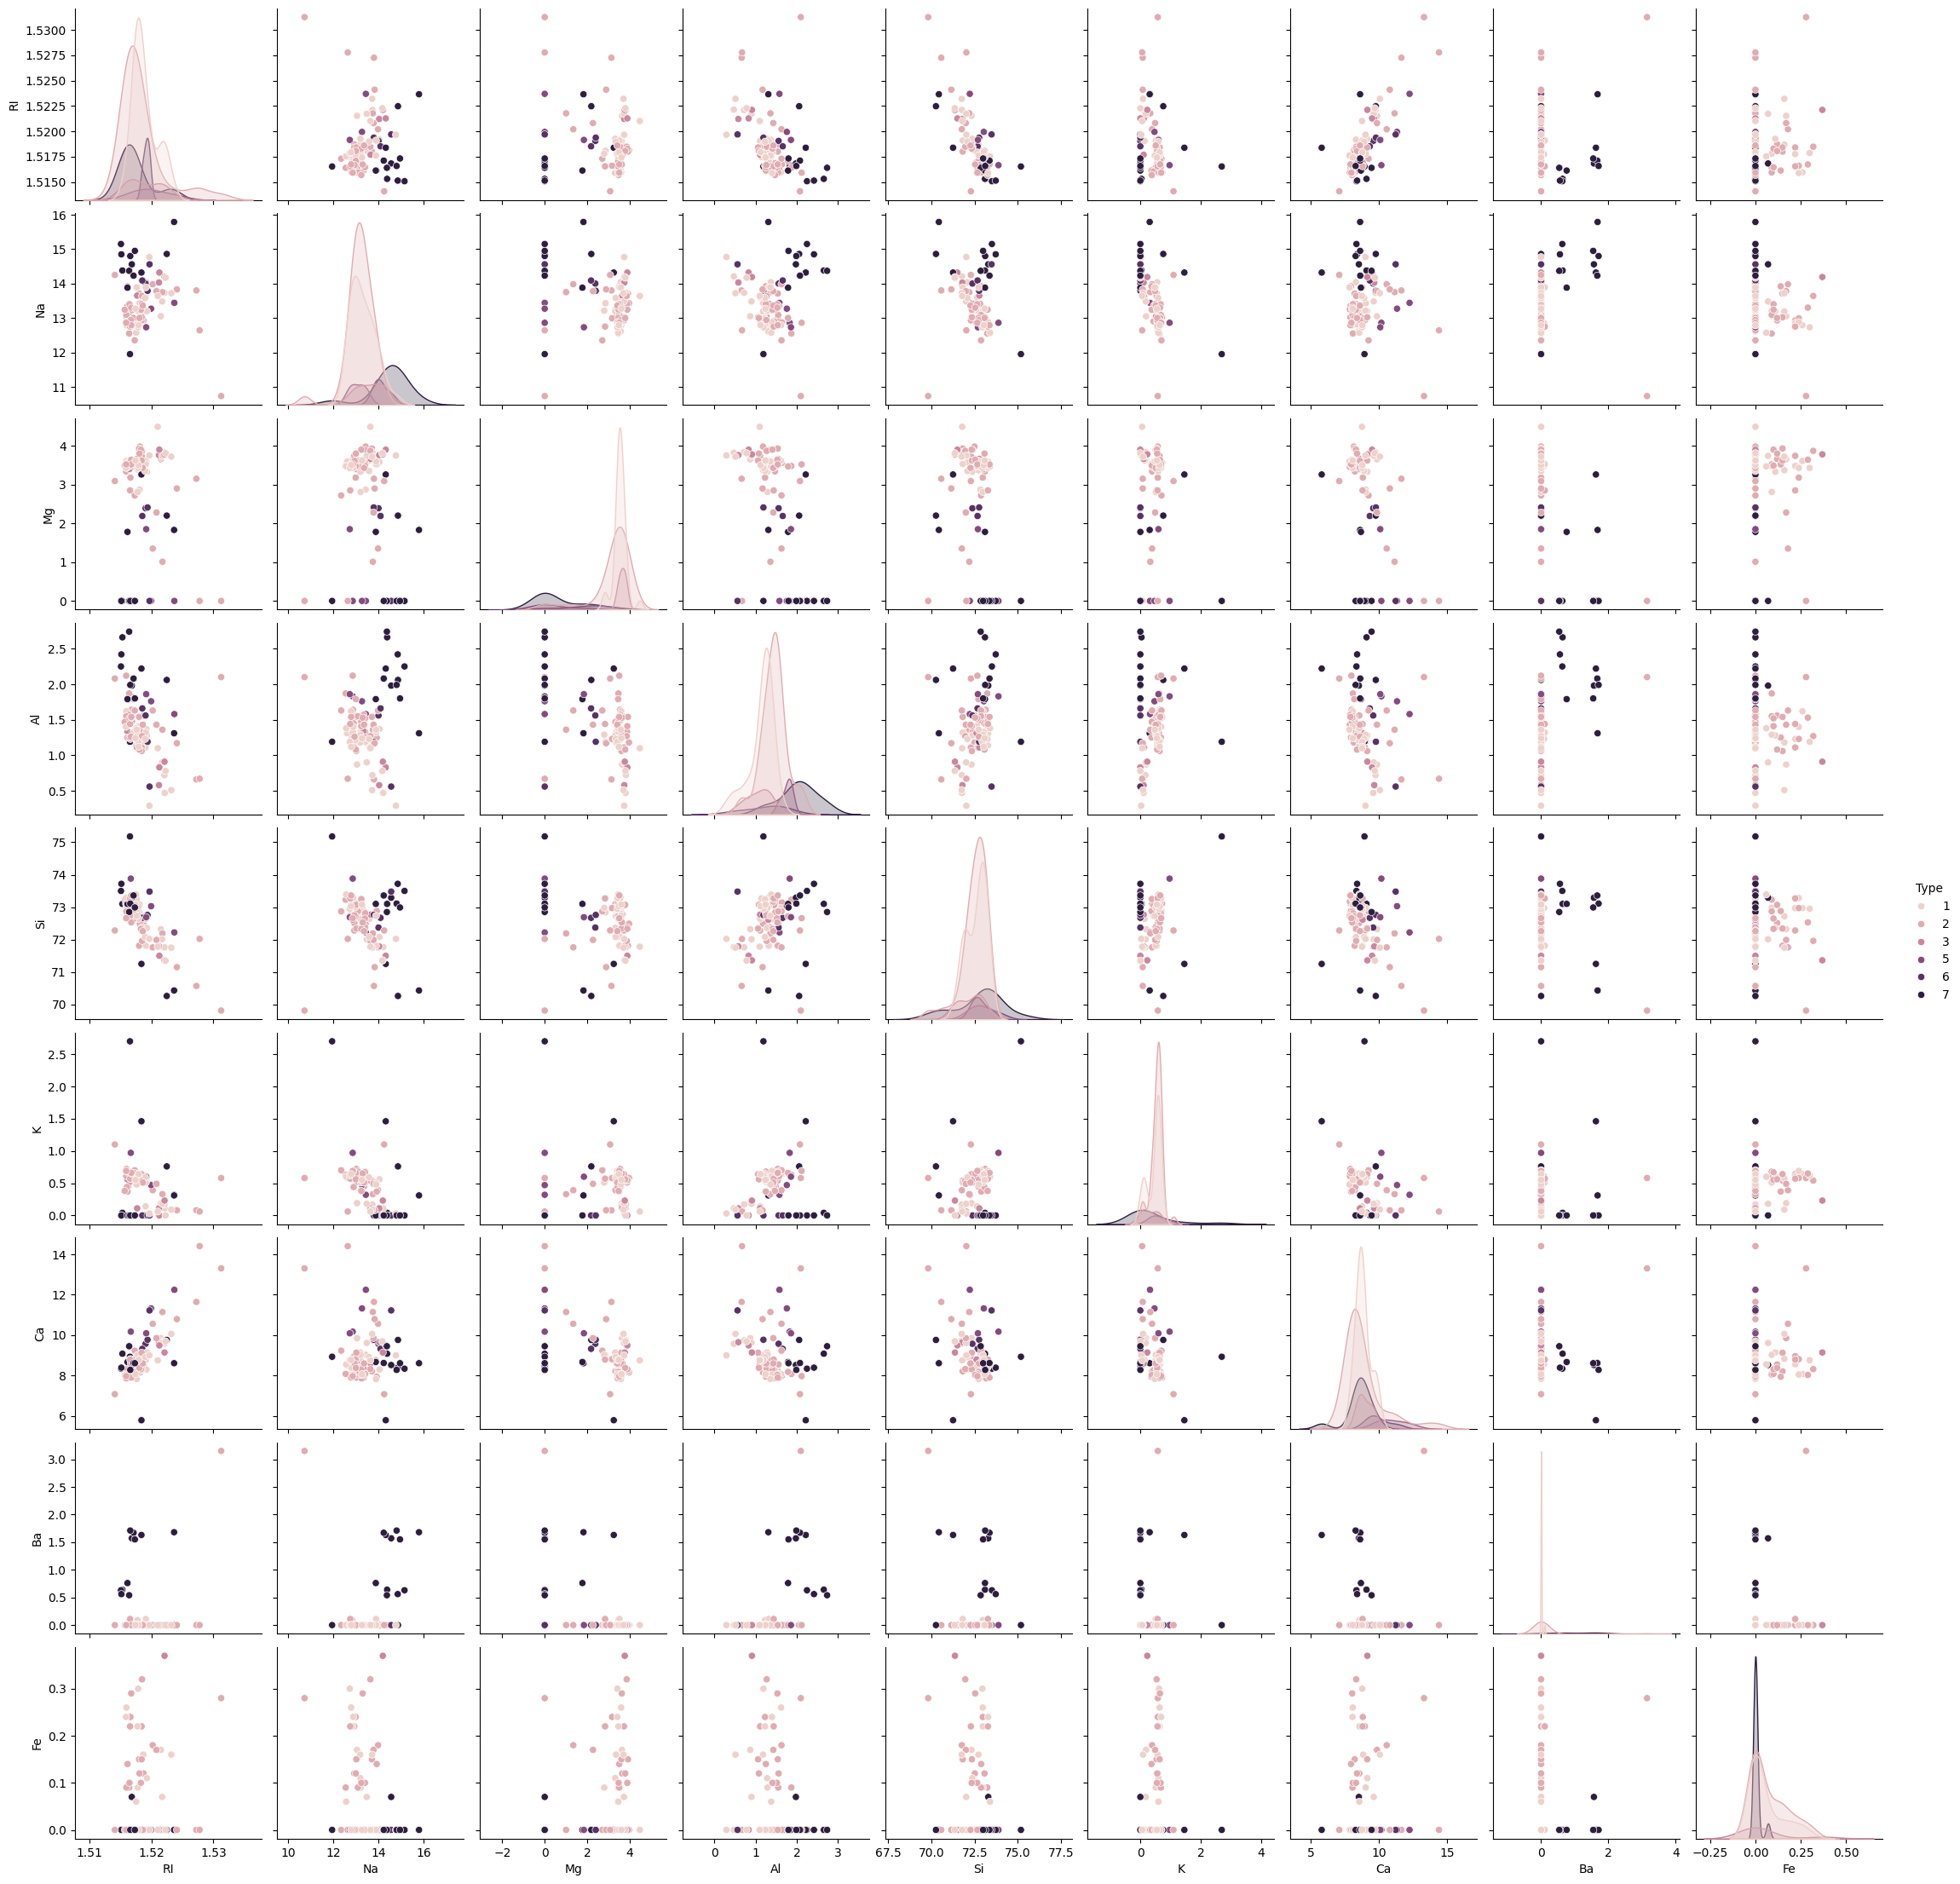

In [9]:
#Pairplot
sns.pairplot(data.sample(100),diag_kind="kde",hue="Type")
plt.show()

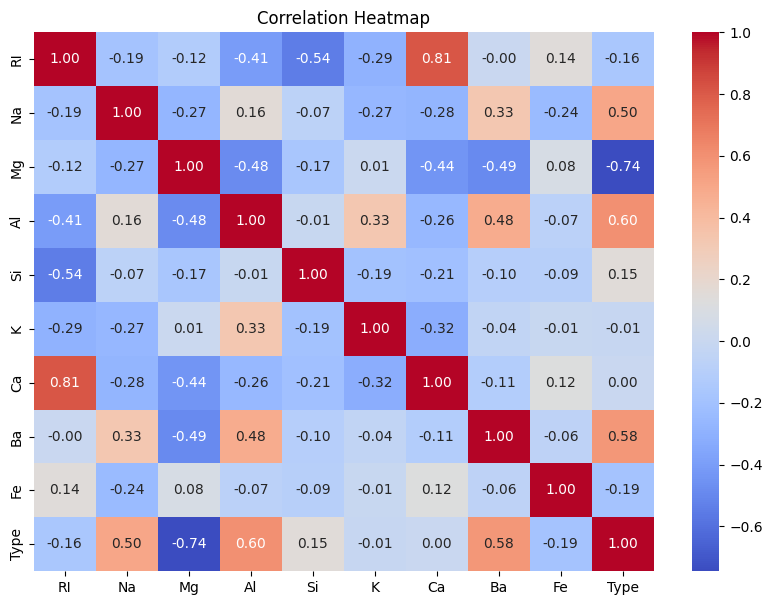

In [10]:
#Correlation heatmap
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap="coolwarm",fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
#Handle Outliers by Capping (IQR Method) -WINSORISATION
def cap_outliers_iqr(df):
    df_cap=df.copy()
    for col in df_cap.columns:
        if df_cap[col].dtype!='object' and col!="Type":  # only numeric features
            Q1=df_cap[col].quantile(0.25)
            Q3=df_cap[col].quantile(0.75)
            IQR=Q3-Q1
            lower=Q1-1.5*IQR
            upper=Q3+1.5*IQR
            # Cap values instead of removing
            df_cap[col]=df_cap[col].clip(lower,upper)
    return df_cap

# Apply capping
data_capped=cap_outliers_iqr(data)

print("Original shape:",data.shape)
print("After capping outliers:",data_capped.shape)

Original shape: (214, 10)
After capping outliers: (214, 10)


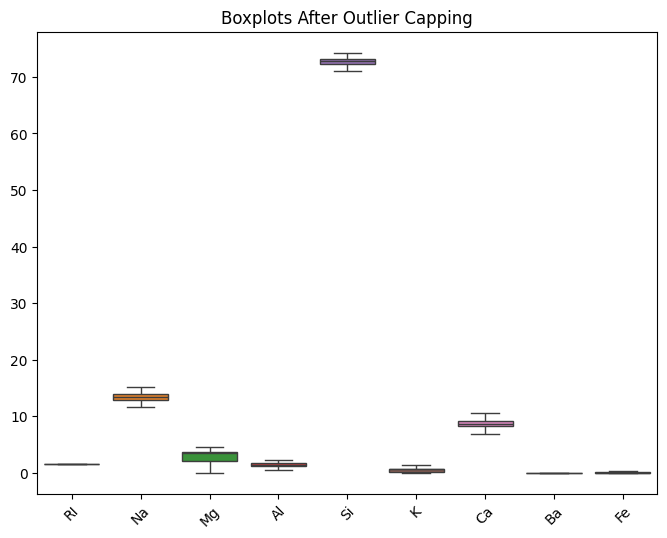

In [12]:
#Boxplots After Capping
plt.figure(figsize=(8,6))
sns.boxplot(data=data_capped.drop(columns="Type"))
plt.xticks(rotation=45)
plt.title("Boxplots After Outlier Capping")
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

#Feature Scaling
X=data.drop("Type",axis=1)   # features
y=data["Type"]                # target

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

print("Scaled Feature Sample:\n",X_scaled[:5])

Scaled Feature Sample:
 [[ 0.87286765  0.28495326  1.25463857 -0.69244192 -1.12708201 -0.67170546
  -0.14576634 -0.35287683 -0.5864509 ]
 [-0.24933347  0.59181718  0.63616803 -0.17046023  0.10231907 -0.02621325
  -0.79373376 -0.35287683 -0.5864509 ]
 [-0.72131806  0.14993314  0.60142249  0.19091171  0.43878673 -0.16453301
  -0.82894938 -0.35287683 -0.5864509 ]
 [-0.23283051 -0.24285268  0.69870999 -0.31099376 -0.0529737   0.11210651
  -0.51905192 -0.35287683 -0.5864509 ]
 [-0.31204471 -0.16920534  0.65006624 -0.41137486  0.55525631  0.08136879
  -0.62469878 -0.35287683 -0.5864509 ]]


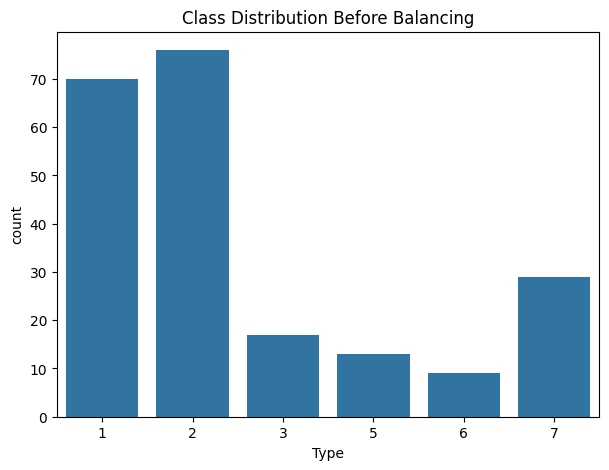

In [14]:
#Handling Imbalanced Data
#Check distribution before balancing
plt.figure(figsize=(7,5))
sns.countplot(x=y)
plt.title("Class Distribution Before Balancing")
plt.show()

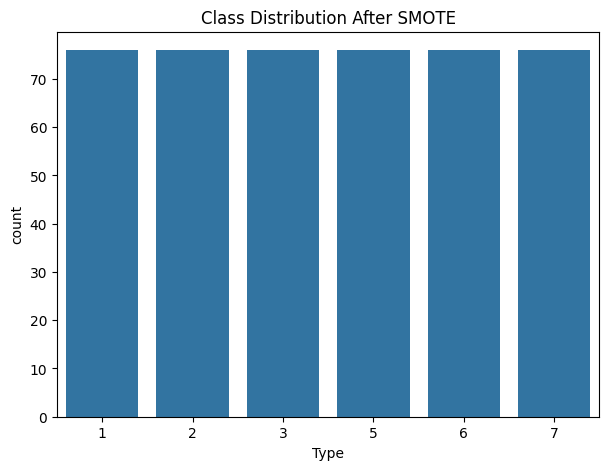

In [15]:
#Apply SMOTE (oversampling minority classes)
smote=SMOTE(random_state=42)
X_res,y_res=smote.fit_resample(X_scaled,y)

#Check distribution after balancing
plt.figure(figsize=(7,5))
sns.countplot(x=y_res)
plt.title("Class Distribution After SMOTE")
plt.show()

In [16]:
print("Original dataset shape:",X.shape,y.shape)
print("Balanced dataset shape:",X_res.shape,y_res.shape)

Original dataset shape: (214, 9) (214,)
Balanced dataset shape: (456, 9) (456,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

#Train-Test Split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=42,stratify=y_res)

print("Train shape:",X_train.shape,y_train.shape)
print("Test shape:",X_test.shape,y_test.shape)

Train shape: (319, 9) (319,)
Test shape: (137, 9) (137,)


In [18]:
#Random Forest Classifier
rf=RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

#Predictions
y_pred=rf.predict(X_test)

Accuracy: 0.9051094890510949
Precision (macro): 0.9064291465378421
Recall (macro): 0.9044795783926217
F1-score (macro): 0.9028917192502175

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.82      0.80        22
           2       0.94      0.74      0.83        23
           3       0.88      0.96      0.92        23
           5       0.92      0.96      0.94        23
           6       0.96      1.00      0.98        23
           7       0.96      0.96      0.96        23

    accuracy                           0.91       137
   macro avg       0.91      0.90      0.90       137
weighted avg       0.91      0.91      0.90       137



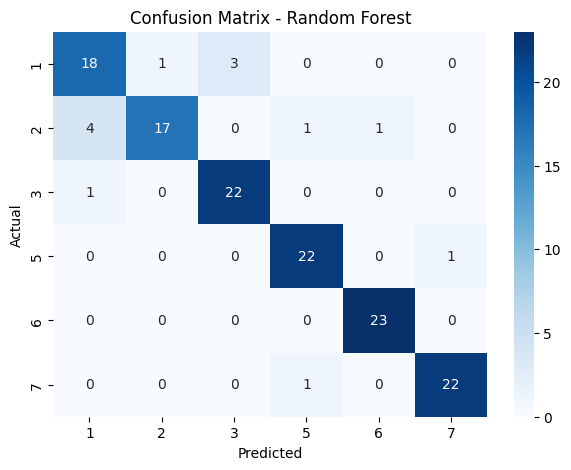

In [19]:
#Evaluation Metrics
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision (macro):",precision_score(y_test,y_pred,average="macro"))
print("Recall (macro):",recall_score(y_test,y_pred,average="macro"))
print("F1-score (macro):",f1_score(y_test,y_pred,average="macro"))

print("\nClassification Report:")
print(classification_report(y_test,y_pred))

#Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",xticklabels=rf.classes_,yticklabels=rf.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [20]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Bagging Classifier
bagging=BaggingClassifier(
    estimator=DecisionTreeClassifier(),
    n_estimators=50,
    random_state=42
)
bagging.fit(X_train,y_train)
y_pred_bag=bagging.predict(X_test)

print("Bagging Results")
print("Accuracy:",accuracy_score(y_test,y_pred_bag))
print("Precision (macro):",precision_score(y_test,y_pred_bag,average="macro"))
print("Recall (macro):",recall_score(y_test,y_pred_bag,average="macro"))
print("F1-score (macro):",f1_score(y_test,y_pred_bag,average="macro"))
print()

Bagging Results
Accuracy: 0.8905109489051095
Precision (macro): 0.8939883489627735
Recall (macro): 0.8903162055335968
F1-score (macro): 0.8881835234864837



In [21]:
#Boosting Classifier (AdaBoost)
boosting=AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    random_state=42
)
boosting.fit(X_train, y_train)
y_pred_boost=boosting.predict(X_test)

print("Boosting Results (AdaBoost)")
print("Accuracy:", accuracy_score(y_test, y_pred_boost))
print("Precision (macro):", precision_score(y_test, y_pred_boost, average="macro"))
print("Recall (macro):", recall_score(y_test, y_pred_boost, average="macro"))
print("F1-score (macro):", f1_score(y_test, y_pred_boost, average="macro"))
print()

Boosting Results (AdaBoost)
Accuracy: 0.4306569343065693
Precision (macro): 0.46796074987372
Recall (macro): 0.42786561264822137
F1-score (macro): 0.39287411568113323



In [22]:
# Comparison Visualization
results={
    "Bagging":[
        accuracy_score(y_test,y_pred_bag),
        precision_score(y_test,y_pred_bag,average="macro"),
        recall_score(y_test,y_pred_bag,average="macro"),
        f1_score(y_test,y_pred_bag,average="macro")
    ],
    "Boosting":[
        accuracy_score(y_test,y_pred_boost),
        precision_score(y_test,y_pred_boost,average="macro"),
        recall_score(y_test,y_pred_boost,average="macro"),
        f1_score(y_test,y_pred_boost,average="macro")
    ]
}

df_results=pd.DataFrame(results, index=["Accuracy","Precision","Recall","F1-score"])
print(df_results)

            Bagging  Boosting
Accuracy   0.890511  0.430657
Precision  0.893988  0.467961
Recall     0.890316  0.427866
F1-score   0.888184  0.392874


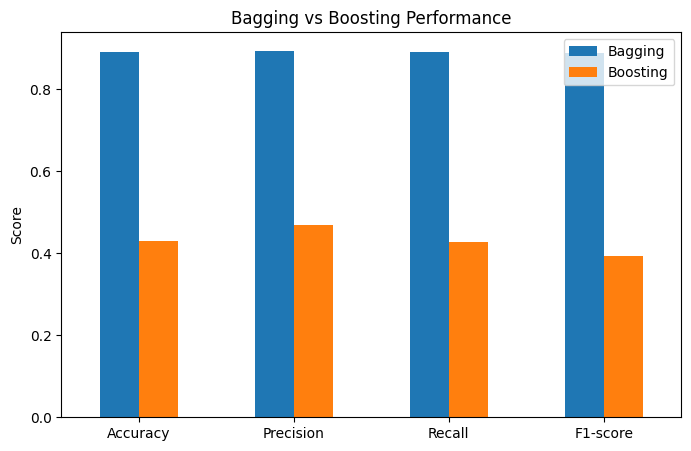

In [23]:
df_results.plot(kind="bar",figsize=(8,5))
plt.title("Bagging vs Boosting Performance")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

### Interview Questions

##### 1. Explain Bagging and Boosting methods. How is it different from each other.

- **Bagging**:  
  - Trains multiple models independently on random subsets of data (with replacement).  
  - Combines predictions by averaging (regression) or majority voting (classification).  
  - Example: Random Forest.  
  - Result -> reduces variance, prevents overfitting.  

- **Boosting**:  
  - Trains models sequentially, where each new model tries to correct errors made by the previous one.  
  - Combines models by weighted sum of predictions.  
  - Example: AdaBoost, Gradient Boosting, XGBoost.  
  - Result -> reduces bias and variance, creates strong learners.  

- **Key Difference**:  
  - Bagging -> models are built in parallel, focus on variance reduction.  
  - Boosting -> models are built sequentially, focus on bias reduction.  

---

##### 2. Explain how to handle imbalance in the data.

- **Resampling techniques**:  
  - Oversampling -> increase minority class samples(e.g.,- SMOTE (Synthetic Minority Over-sampling Technique) -> creates new synthetic samples of the minority class by interpolating between existing samples.).  
  - Undersampling -> reduce majority class samples.  

- **Class weights**:  
  - Assign higher weights to minority class during model training.  
  - Supported in algorithms like Logistic Regression,SVM,Random Forest,XGBoost.   

- **Cost-sensitive learning**  
   - Instead of balancing the data, modify the algorithm’s loss function to penalize misclassification of minority class more heavily.  
   - Many ML libraries allow setting `class_weight='balanced'. 

- **Ensemble methods for imbalance**  
   - Balanced Random Forest -> modifies Random Forest by undersampling the majority class for each tree.  

- **Use different metrics**:  
  - Accuracy is misleading in imbalanced data.  
  - Prefer Precision,Recall,F1-score,ROC-AUC. 

- **Collect more data**:  
  - If possible, gather more samples for minority class.  

* Goal -> balance classes so the model does not become biased toward majority class.  
